In [1]:
import math
import numpy as np
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.stats import poisson
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tools.numdiff import approx_hess1, approx_hess2, approx_hess3
import pandas as pd
import pymc as pm
import sys
import arviz as az
import pickle

with open('trace', 'rb') as f:
    loaded_data = pickle.load(f)

switchpoints1 = np.array(loaded_data.posterior.switchpoints)
np.shape(switchpoints1)

#switchpoints1是中级变量，后面经过处理的switchpoints才是最终的结果
#如果也用switchpoints是不对的，这样再重复运行第二个模块时会出问题

(4, 80000, 7)

In [2]:
loaded_data.sample_stats

<xarray.Dataset>
Dimensions:                (chain: 4, draw: 80000)
Coordinates:
  * chain                  (chain) int64 0 1 2 3
  * draw                   (draw) int64 0 1 2 3 4 ... 79996 79997 79998 79999
Data variables: (12/17)
    perf_counter_start     (chain, draw) float64 2.735e+06 ... 2.753e+06
    smallest_eigval        (chain, draw) float64 nan nan nan nan ... nan nan nan
    process_time_diff      (chain, draw) float64 0.222 0.2214 ... 0.1918 0.1945
    step_size              (chain, draw) float64 0.001328 0.001328 ... 0.0005174
    diverging              (chain, draw) bool False False False ... False False
    index_in_trajectory    (chain, draw) int64 152 -216 -198 ... -584 791 -757
    ...                     ...
    energy_error           (chain, draw) float64 -8.321e-09 ... -1.587e-09
    max_energy_error       (chain, draw) float64 56.3 54.65 ... -2.067e-09
    reached_max_treedepth  (chain, draw) bool True True True ... True True True
    acceptance_rate        (chain, draw) float64 0.5668 0.3953 ... 1.0 1.0
    largest_eigval         (chain, draw) float64 nan nan nan nan ... nan nan nan
    lp                     (chain, draw) float64 -4.658e+03 ... -4.047e+03
Attributes:
    created_at:                 2023-08-22T09:41:57.942588
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.7.1
    sampling_time:              21888.55535888672
    tuning_steps:               20000

In [11]:
acceptance = np.array(loaded_data.sample_stats.acceptance_rate)
print(np.shape(acceptance))

(4, 80000)


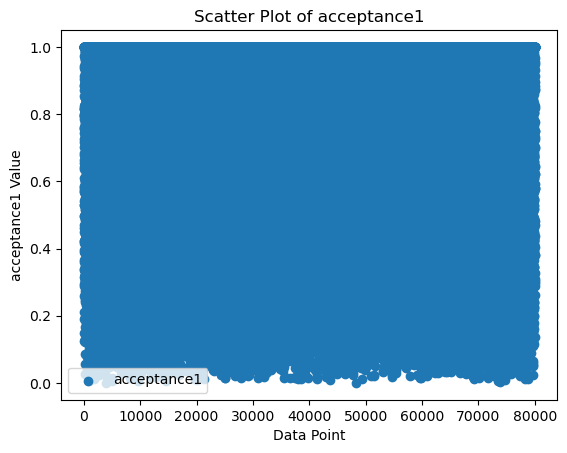

In [12]:
acceptance_a = acceptance.flatten # _a表示all,即所有链
acceptance1 = acceptance[0]

import matplotlib.pyplot as plt



# 创建散点图
plt.scatter(range(len(acceptance1)), acceptance1, label='acceptance1')

# 添加标题和标签
plt.title('Scatter Plot of acceptance1')
plt.xlabel('Data Point')
plt.ylabel('acceptance1 Value')

# 显示图例
plt.legend()

# 显示散点图
plt.show()


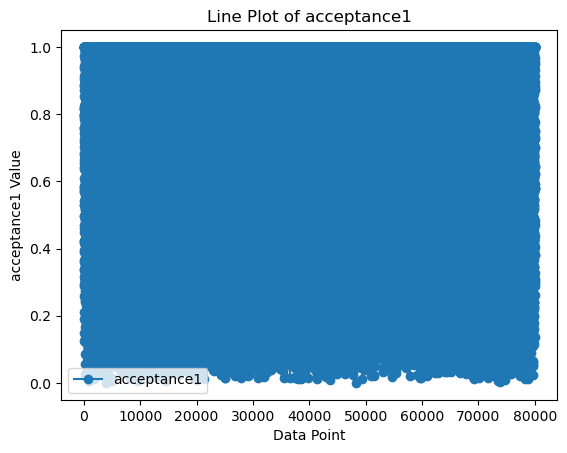

In [13]:
import matplotlib.pyplot as plt


# 创建折线图
plt.plot(range(len(acceptance1)), acceptance1, label='acceptance1', marker='o')

# 添加标题和标签
plt.title('Line Plot of acceptance1')
plt.xlabel('Data Point')
plt.ylabel('acceptance1 Value')

# 显示图例
plt.legend()

# 显示折线图
plt.show()


In [14]:


# 计算均值
mean_value = np.mean(acceptance1)

# 计算方差
variance_value = np.var(acceptance1)

# 打印结果
print(f'均值 (Mean): {mean_value}')
print(f'方差 (Variance): {variance_value}')


均值 (Mean): 0.7124835853338687
方差 (Variance): 0.08090966471226202


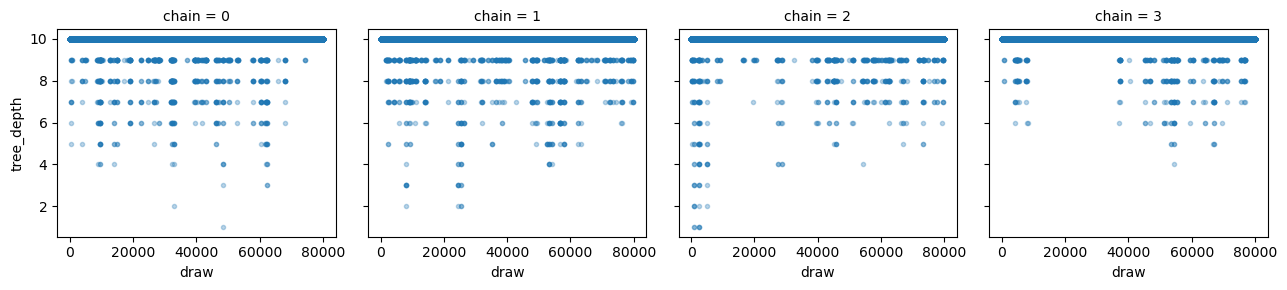

In [15]:
loaded_data.sample_stats["tree_depth"].plot(col="chain", ls="none", marker=".", alpha=0.3);

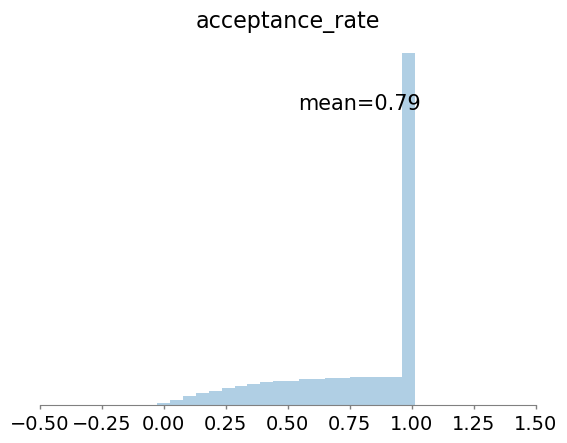

In [16]:
az.plot_posterior(
    loaded_data, group="sample_stats", var_names="acceptance_rate", hdi_prob="hide", kind="hist"
);

In [18]:
loaded_data.sample_stats["diverging"].sum()

<xarray.DataArray 'diverging' ()>
array(5986)

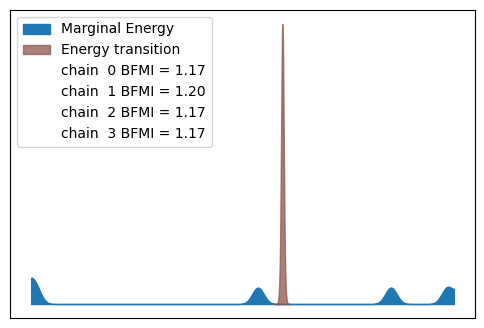

In [19]:
az.plot_energy(loaded_data, figsize=(6, 4));

In [20]:
list(loaded_data.sample_stats.data_vars)

['perf_counter_start',
 'smallest_eigval',
 'process_time_diff',
 'step_size',
 'diverging',
 'index_in_trajectory',
 'n_steps',
 'perf_counter_diff',
 'step_size_bar',
 'energy',
 'tree_depth',
 'energy_error',
 'max_energy_error',
 'reached_max_treedepth',
 'acceptance_rate',
 'largest_eigval',
 'lp']

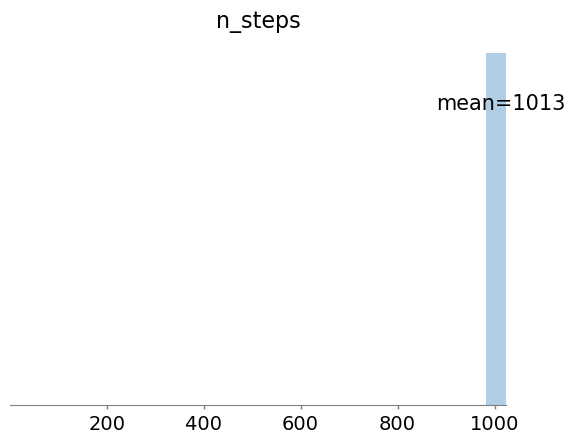

In [25]:
az.plot_posterior(
    loaded_data,
    group="sample_stats",
    var_names="n_steps",
    hdi_prob="hide",
    kind="hist",
);

In [28]:
# Range of accept values
loaded_data.sample_stats["acceptance_rate"].max("draw") - loaded_data.sample_stats["acceptance_rate"].min("draw")

<xarray.DataArray 'acceptance_rate' (chain: 4)>
array([1.        , 0.99902248, 1.        , 0.99608993])
Coordinates:
  * chain    (chain) int64 0 1 2 3